In [1]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from simul import (
    in_femto_sec, in_electron_volt, to_femto_sec, to_electron_volt,
    ispeak, N2WavePackets,
)

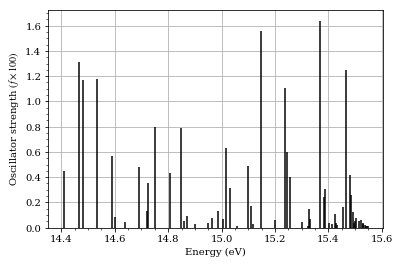

In [2]:
df = N2WavePackets.target


plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 4))
plt.xlabel('Energy (eV)')
plt.ylabel(r'Oscillator strength $\left( f \times 100 \right)$')
plt.vlines(df['level (eV)'], 0, df['jet absorption'])
plt.ylim(0, None)
plt.grid(True)
plt.show()

In [3]:
params = {
    'fwhm': 79.4,  # fwhm of pulse intensity in fs
    'k0': (15.3852357 + 15.36765475) / 2,  # eV
    'dt': 1.5 * to_femto_sec(2 * np.pi / in_electron_volt(15.3852357 - 15.36765475)),
    # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
    'phi': 0,  # deg
}
t = np.linspace(
    in_femto_sec(-100),
    in_femto_sec(1000),
    1101,
)
k = np.linspace(
    in_electron_volt(15.35),
    in_electron_volt(15.4),
    501,
)

y-axis limits: (0.0, 1.1882293105095258)
y-axis limits: (0.0, 0.00022)
y-axis limits: (-2e-08, 2e-08)
y-axis limits: (0.0, 1.6e-07)


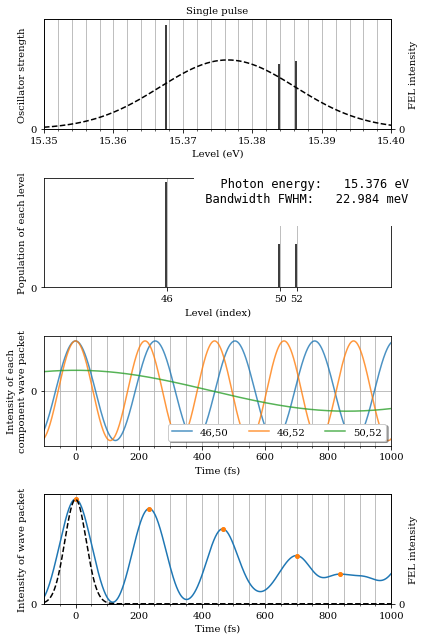

Local maximums at:
       0:     -0 fs
       1:    234 fs
       2:    466 fs
       3:    700 fs
       4:    839 fs


In [4]:
wave = N2WavePackets.in_experimental_units(
    **{**params, 'dt': 0, 'phi': 0},
)


# fig1-1
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 9))
plt.subplot(411)
plt.title('Single pulse')
def plotme1(t: np.ndarray, k: np.ndarray, wave: N2WavePackets,
            verbose=False, labels=None):
    plt.xlabel('Level (eV)')
    plt.ylabel('Oscillator strength')
    plt.vlines(to_electron_volt(wave.target_klev),
               0, wave.target_strengths ** 0.5)
    plt.xlim(to_electron_volt(k[0]),
             to_electron_volt(k[-1]))
    plt.ylim(0, None)
    plt.locator_params(axis='x', steps=[1, 2, 5, 10])
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
    if verbose:
        print(f"y-axis limits: {plt.ylim()}")
    if labels == 'hide':
        plt.xlabel('')
        plt.ylabel('')
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        plt.setp(plt.gca().get_yticklabels(), visible=False)
    elif labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)

    # fig1-2
    plt.twinx()
    plt.ylabel('FEL intensity')
    plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k))**2, 'k--')
    plt.ylim(0, 6.5e-8)  # Set fixed limits!
    plt.yticks([0], [0])
    if labels == 'hide' or labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)
plotme1(t, k, wave, verbose=True)


# fig2
plt.subplot(412)
def plotme2(t: np.ndarray, k: np.ndarray, wave: N2WavePackets,
            verbose=False, labels=None):
    plt.xlabel("Level (index)")
    plt.ylabel("Population of each level")
    plt.vlines(to_electron_volt(wave.target_klev),
               0, np.abs(wave.target_poplev()))
    plt.xlim(to_electron_volt(k[0]),
             to_electron_volt(k[-1]))
    plt.ylim(0, 0.00022)  # Set fixed limits!
    plt.xticks([wave.target['level (eV)'][i] for i in [46, 50, 52]],
               [46, 50, 52])
    plt.yticks([0], [0])
    plt.minorticks_off()
    plt.grid(True)
    if verbose:
        print(f"y-axis limits: {plt.ylim()}")
    if labels == 'hide':
        plt.xlabel('')
        plt.ylabel('')
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        plt.setp(plt.gca().get_yticklabels(), visible=False)
    elif labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)
plotme2(t, k, wave, verbose=True)
plt.text(
    1.05, 1,
    f"  Photon energy: {params['k0']:>8.3f} eV\n"
    f" Bandwidth FWHM: {to_electron_volt(wave.kdim_fwhm)*1000:>8.3f} meV\n",
    fontsize='large', family='monospace',
    ha='right', va='top', transform=plt.gca().transAxes,
    bbox={'facecolor': 'white', 'edgecolor': 'white'},
)


# fig3
plt.subplot(413)
def plotme3(t: np.ndarray, k: np.ndarray, wave: N2WavePackets,
            verbose=False, labels=None):
    wavesq = wave(t)
    n = wave.target.index
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity of each\ncomponent wave packet")
    for i, j in [[46, 50], [46, 52], [50, 52]]:
        plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{i},{j}')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(-2e-08, 2e-08)  # Set fixed limits!
    plt.locator_params(axis='x', steps=[1, 2, 5, 10])
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
    if verbose:
        print(f"y-axis limits: {plt.ylim()}")
    if labels == 'hide':
        plt.xlabel('')
        plt.ylabel('')
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        plt.setp(plt.gca().get_yticklabels(), visible=False)
    elif labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)
plotme3(t, k, wave, verbose=True)
plt.legend(loc='lower right', ncol=3, shadow=True)


# fig4-1
plt.subplot(414)
def plotme4(t: np.ndarray, k: np.ndarray, wave: N2WavePackets,
            verbose=False, labels=None):
    wavesq = wave(t)
    y = np.abs(wavesq.sum((1,2)))
    w = ispeak(y)
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity of wave packet")
    plt.plot(to_femto_sec(t), y)
    plt.plot(to_femto_sec(t[w]), y[w], 'o')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(0, 1.6e-07)  # Set fixed limits!
    plt.locator_params(axis='x', steps=[1, 2, 5, 10])
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
    if verbose:
        print(f"y-axis limits: {plt.ylim()}")
    if labels == 'hide':
        plt.xlabel('')
        plt.ylabel('')
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        plt.setp(plt.gca().get_yticklabels(), visible=False)
    elif labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)

    # fig4-2
    plt.twinx()
    plt.ylabel('FEL intensity')
    plt.plot(to_femto_sec(t), wave.pulsesabc(t)**2, 'k--')
    plt.ylim(0, None)
    plt.yticks([0], [0])
    if labels == 'hide' or labels == 'xonly':
        plt.ylabel('')
        plt.setp(plt.gca().get_yticklabels(), visible=False)
plotme4(t, k, wave, verbose=True)
plt.tight_layout()
# plt.savefig("Figures/N2 single pulse simulation.pdf")
plt.show()

wavesq = wave(t)
y = np.abs(wavesq.sum((1, 2)))
w = ispeak(y)
print("""\
Local maximums at:
    {}""".format(
        "\n    ".join(f"{i:>4d}: {v:6.0f} fs" for i, v in enumerate(to_femto_sec(t[w]))),
    )
)

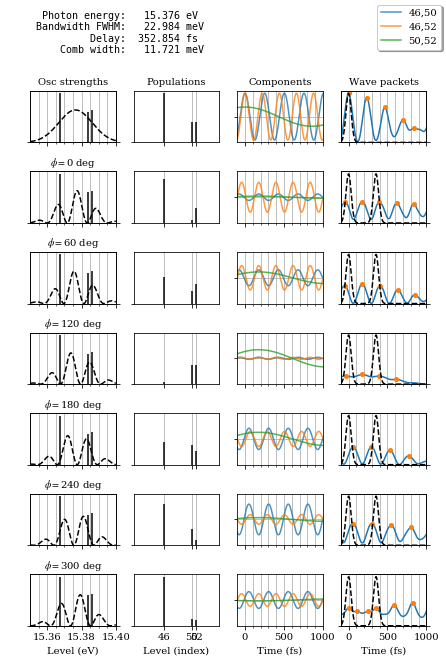

In [5]:
wave = N2WavePackets.in_experimental_units(
    **{**params, 'dt': 0, 'phi': 0},
)

# fig1-1
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 9))
plt.subplot(8, 4, 1)
plt.text(
    0, 1,
    f"  Photon energy: {params['k0']:>8.3f} eV\n"
    f" Bandwidth FWHM: {to_electron_volt(wave.kdim_fwhm)*1000:>8.3f} meV\n"
    f"          Delay: {params['dt']:>8.3f} fs\n"
    f"     Comb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt']))*1000:>8.3f} meV",
    fontsize='medium', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(8,4,5)
plt.title('Osc strengths')
plotme1(t, k, wave, labels='hide')

plt.subplot(8,4,6)
plt.title('Populations')
plotme2(t, k, wave, labels='hide')

plt.subplot(8,4,7)
plt.title('Components')
plotme3(t, k, wave, labels='hide')
plt.figlegend(loc='upper right', shadow=True)

plt.subplot(8,4,8)
plt.title('Wave packets')
plotme4(t, k, wave, labels='hide')

for i, phi in enumerate(range(0, 360, 60)):
    wave = N2WavePackets.in_experimental_units(
        **{**params, 'phi': phi}
    )
    plt.subplot(8, 4, 4 * (i+2) + 1)
    plt.title(r'$\phi =$' f'{phi} deg')
    plotme1(t, k, wave, labels='xonly' if i==5 else 'hide')
    
    plt.subplot(8, 4, 4 * (i+2) + 2)
    plotme2(t, k, wave, labels='xonly' if i==5 else 'hide')
    
    plt.subplot(8, 4, 4 * (i+2) + 3)
    plotme3(t, k, wave, labels='xonly' if i==5 else 'hide')

    plt.subplot(8, 4, 4 * (i+2) + 4)
    plotme4(t, k, wave, labels='xonly' if i==5 else 'hide')
plt.tight_layout(pad=0)
# plt.savefig("Figures/N2 double pulse simulation (1 T).pdf")
plt.show()